# Lead Scoring Case Study


In [2074]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2075]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [2076]:
lead = pd.read_csv("Leads.csv", encoding='utf-8',engine='python', skipinitialspace = True)

In [2077]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2078]:
lead.shape

(9240, 37)

In [2079]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2080]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [2081]:
emptycol=lead.isnull().sum()
emptycol

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [2082]:
df = lead.count()/len(lead)
df

Prospect ID                                      1.000000
Lead Number                                      1.000000
Lead Origin                                      1.000000
Lead Source                                      0.996104
Do Not Email                                     1.000000
Do Not Call                                      1.000000
Converted                                        1.000000
TotalVisits                                      0.985173
Total Time Spent on Website                      1.000000
Page Views Per Visit                             0.985173
Last Activity                                    0.988853
Country                                          0.733658
Specialization                                   0.844372
How did you hear about X Education               0.761147
What is your current occupation                  0.708874
What matters most to you in choosing a course    0.706818
Search                                           1.000000
Magazine      

In [2083]:
df = (1-df)*100
df

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [2084]:
df.sort_values(ascending=False).head(100)

Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Index                      45.649351
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [2085]:
lead = lead.loc[:, df<60]
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


Columns like lead quality looks important so lets analyse the cols

In [2086]:
lead.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [2087]:
lead['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [2088]:
lead['Lead Quality'].head()

0    Low in Relevance
1                 NaN
2            Might be
3            Not Sure
4            Might be
Name: Lead Quality, dtype: object

In [2089]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

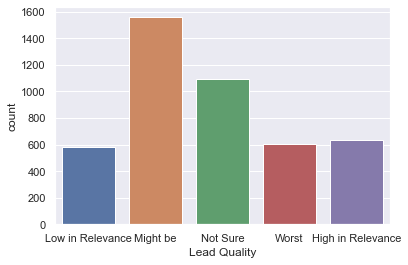

In [2090]:
sns.countplot(x= 'Lead Quality', data = lead)
plt.xticks(rotation=0)

In [2091]:
lead['Converted'].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

Agenda: 
1. prep
2. cleaning
3. model.........tak!!

cols = list(lead)
null = ['select']
null = []
for i in range(len[list(lead)]):
    if(len(lead[cols[i]].isin(null)))

In [2092]:
##city  and How did you hear about X Education 


In [2093]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2094]:
dropthesecols=['Prospect ID','Lead Number','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview']
lead = lead.drop(dropthesecols,1)

In [2095]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,Modified


In [2096]:
lead.shape

(9240, 32)

Find out where the selects are there 

In [2097]:
lead.head(50)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.00,Page Visited on Website,Select,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.50,Email Opened,Select,...,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.00,Email Opened,Business Administration,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.00,Unreachable,Media and Advertising,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.00,Converted to Lead,Select,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,Modified
5,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,NaN,No,No,NaN,NaN,01.High,02.Medium,17.0,15.0,Modified
6,Landing Page Submission,Google,No,No,1,2.0,1640,2.00,Email Opened,Supply Chain Management,...,Low in Relevance,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Modified
7,API,Olark Chat,No,No,0,0.0,0,0.00,Olark Chat Conversation,NaN,...,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,Modified
8,Landing Page Submission,Direct Traffic,No,No,0,2.0,71,2.00,Email Opened,IT Projects Management,...,NaN,No,No,NaN,Thane & Outskirts,02.Medium,02.Medium,14.0,14.0,Email Opened
9,API,Google,No,No,0,4.0,58,4.00,Email Opened,Finance Management,...,NaN,No,No,NaN,Mumbai,02.Medium,02.Medium,13.0,16.0,Email Opened


In [2098]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [2099]:
lead['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

with this approach its good to delete the city column too, because no other city is populated

In [2100]:
dropcol= ['City']

lead = lead.drop(dropcol,1)
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,...,Interested in other courses,Low in Relevance,No,No,Select,02.Medium,02.Medium,15.0,15.0,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,...,Ringing,NaN,No,No,Select,02.Medium,02.Medium,15.0,15.0,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,...,Will revert after reading the email,Might be,No,No,Potential Lead,02.Medium,01.High,14.0,20.0,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,...,Ringing,Not Sure,No,No,Select,02.Medium,01.High,13.0,17.0,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,...,Will revert after reading the email,Might be,No,No,Select,02.Medium,01.High,15.0,18.0,Modified


In [2101]:
lead['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [2102]:
lead['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [2103]:
lead['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [2104]:
cols=list(lead.columns)
test=['Select']
text=[]
for i in range(len(cols)):
    if len(lead[cols[i]].isin(test).unique())>1:
        text.append(cols[i])
        
text

['Specialization', 'How did you hear about X Education', 'Lead Profile']

In [2105]:
df_1=pd.DataFrame(lead['Specialization'])
df_2=pd.DataFrame(lead['Lead Profile'])
df_3=pd.DataFrame(lead['How did you hear about X Education'])

In [2106]:
df_1=df_1.replace(df_1.loc[df_1['Specialization']=='Select'],value=np.nan)
df_2=df_2.replace(df_2.loc[df_2['Lead Profile']=='Select'],value=np.nan)
df_3=df_3.replace(df_3.loc[df_3['How did you hear about X Education']=='Select'],value=np.nan)

In [2107]:
lead['Specialization']=df_1['Specialization']
lead['Lead Profile']=df_2['Lead Profile']
lead['How did you hear about X Education']=df_3['How did you hear about X Education']

After replacing all the select words lets check the null values again(in case) we missed anything

In [2108]:
round(lead.isnull().sum()/len(lead)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [2109]:
drop_cols=lead.isnull().sum()
drop_cols=drop_cols[drop_cols.values/len(lead)>0.30]
len(drop_cols)

9

# we will drop the 9 cols

In [2110]:
drop_columns = list(drop_cols.keys())
lead = lead.drop(drop_columns,1)  
round(lead.isnull().sum()/len(lead)*100,2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Advertisement                             0.00
Through Recommendations                           0.00
Receive Mo

we have removed the 9 cols where data was havine more than 30% of missing values

In [2111]:
# chekcing for missing values after imputing values to the missing area
lead.isnull().sum() 

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations                             0
Receive More Updates About O

we see the cols names and we need to do something for the null values here

In [2112]:
lead['Lead Source'].value_counts().head(10)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
bing                   6
google                 5
Name: Lead Source, dtype: int64

In [2113]:

lead['TotalVisits'].value_counts().head(10)

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
6.0     466
1.0     395
7.0     309
8.0     224
9.0     164
Name: TotalVisits, dtype: int64

In [2114]:

lead['Page Views Per Visit'].value_counts().head(10)

0.0    2189
2.0    1795
3.0    1196
4.0     896
1.0     651
5.0     517
1.5     306
6.0     244
2.5     241
7.0     133
Name: Page Views Per Visit, dtype: int64

In [2115]:

lead['Last Activity'].value_counts().head(10)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Name: Last Activity, dtype: int64

In [2116]:

lead['What is your current occupation'].value_counts().head(10)

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2117]:

lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2118]:
missing_values={'Lead Source':'Google','TotalVisits':'0.0','Page Views Per Visit':'0.0','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed','What matters most to you in choosing a course':'Better Career Prospects'}

lead=lead.fillna(value=missing_values)

In [2119]:
lead.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our Courses           0
Update me on Supply Chain Conte

In [2120]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   object
 3   Do Not Call                                    9240 non-null   object
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [2121]:
# creating dictionary for two categories
category={"No":0,"Yes":1}   

In [2122]:
lead['Do Not Email'].value_counts()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [2123]:
lead['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [2124]:
lead['Do Not Call'].value_counts()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [2125]:
lead['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [2126]:
lead['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [2127]:
lead['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [2128]:
lead['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [2129]:
lead['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [2130]:
lead['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [2131]:
lead['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [2132]:
lead['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [2133]:
lead['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [2134]:
lead['Do Not Email']=lead['Do Not Email'].map(category)

lead['Search'] = lead['Search'].map(category)

lead['Do Not Call'] = lead['Do Not Call'].map(category)

lead['Magazine']= lead['Magazine'].map(category)

lead['Newspaper Article'] = lead['Newspaper Article'].map(category)

lead['X Education Forums'] = lead['X Education Forums'].map(category)

lead['Newspaper'] = lead['Newspaper'].map(category)

lead['Digital Advertisement'] = lead['Digital Advertisement'].map(category)

lead['Through Recommendations'] = lead['Through Recommendations'].map(category)

lead['Receive More Updates About Our Courses'] = lead['Receive More Updates About Our Courses'].map(category)

lead['Update me on Supply Chain Content'] = lead['Update me on Supply Chain Content'].map(category)

lead['Get updates on DM Content'] = lead['Get updates on DM Content'].map(category)

In [2135]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Lead Origin                                    9240 non-null   object
 1   Lead Source                                    9240 non-null   object
 2   Do Not Email                                   9240 non-null   int64 
 3   Do Not Call                                    9240 non-null   int64 
 4   Converted                                      9240 non-null   int64 
 5   TotalVisits                                    9240 non-null   object
 6   Total Time Spent on Website                    9240 non-null   int64 
 7   Page Views Per Visit                           9240 non-null   object
 8   Last Activity                                  9240 non-null   object
 9   What is your current occupation                9240 non-null   

In [2136]:
lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Last Notable Activity
0,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2,1532,2,Email Opened,Student,...,0,0,0,0,0,0,0,0,0,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1,305,1,Unreachable,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2,1428,1,Converted to Lead,Unemployed,...,0,0,0,0,0,0,0,0,0,Modified


In [2137]:
dummy=pd.get_dummies(lead[['Lead Origin','Lead Source','Last Activity','What is your current occupation',
                             'What matters most to you in choosing a course','Last Notable Activity']],drop_first=True)

In [2138]:
lead = pd.concat([lead,dummy],axis=1)

In [2139]:
lead.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0,0,0,Page Visited on Website,Unemployed,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5,674,2.5,Email Opened,Unemployed,...,0,0,0,0,0,0,0,0,0,0


In [2140]:
lead.shape

(9240, 84)

we will now drop the dublicates

In [2141]:
duplicates=['Lead Origin','Lead Source','Last Activity','What is your current occupation',
            'What matters most to you in choosing a course','Last Notable Activity']


lead = lead.drop(duplicates,1)

lead.shape

(9240, 78)

In [2142]:
lead.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',

we will now drop the cols which are not needed, this is all part of data cleaning

In [2143]:
redundant=['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Magazine']

lead=lead.drop(redundant,1)

Converting some categories to numercial as they are imported as an 'Object'


In [2144]:
lead[['TotalVisits']] = pd.to_numeric(lead['TotalVisits'], errors='coerce',downcast=None)

In [2145]:
lead[['Page Views Per Visit']] = pd.to_numeric(lead['Page Views Per Visit'], errors='coerce',downcast=None)

In [2146]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 74 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             9240 non-null   int64  
 1   Do Not Call                                                              9240 non-null   int64  
 2   Converted                                                                9240 non-null   int64  
 3   TotalVisits                                                              9240 non-null   float64
 4   Total Time Spent on Website                                              9240 non-null   int64  
 5   Page Views Per Visit                                                     9240 non-null   float64
 6   Search                                                                  

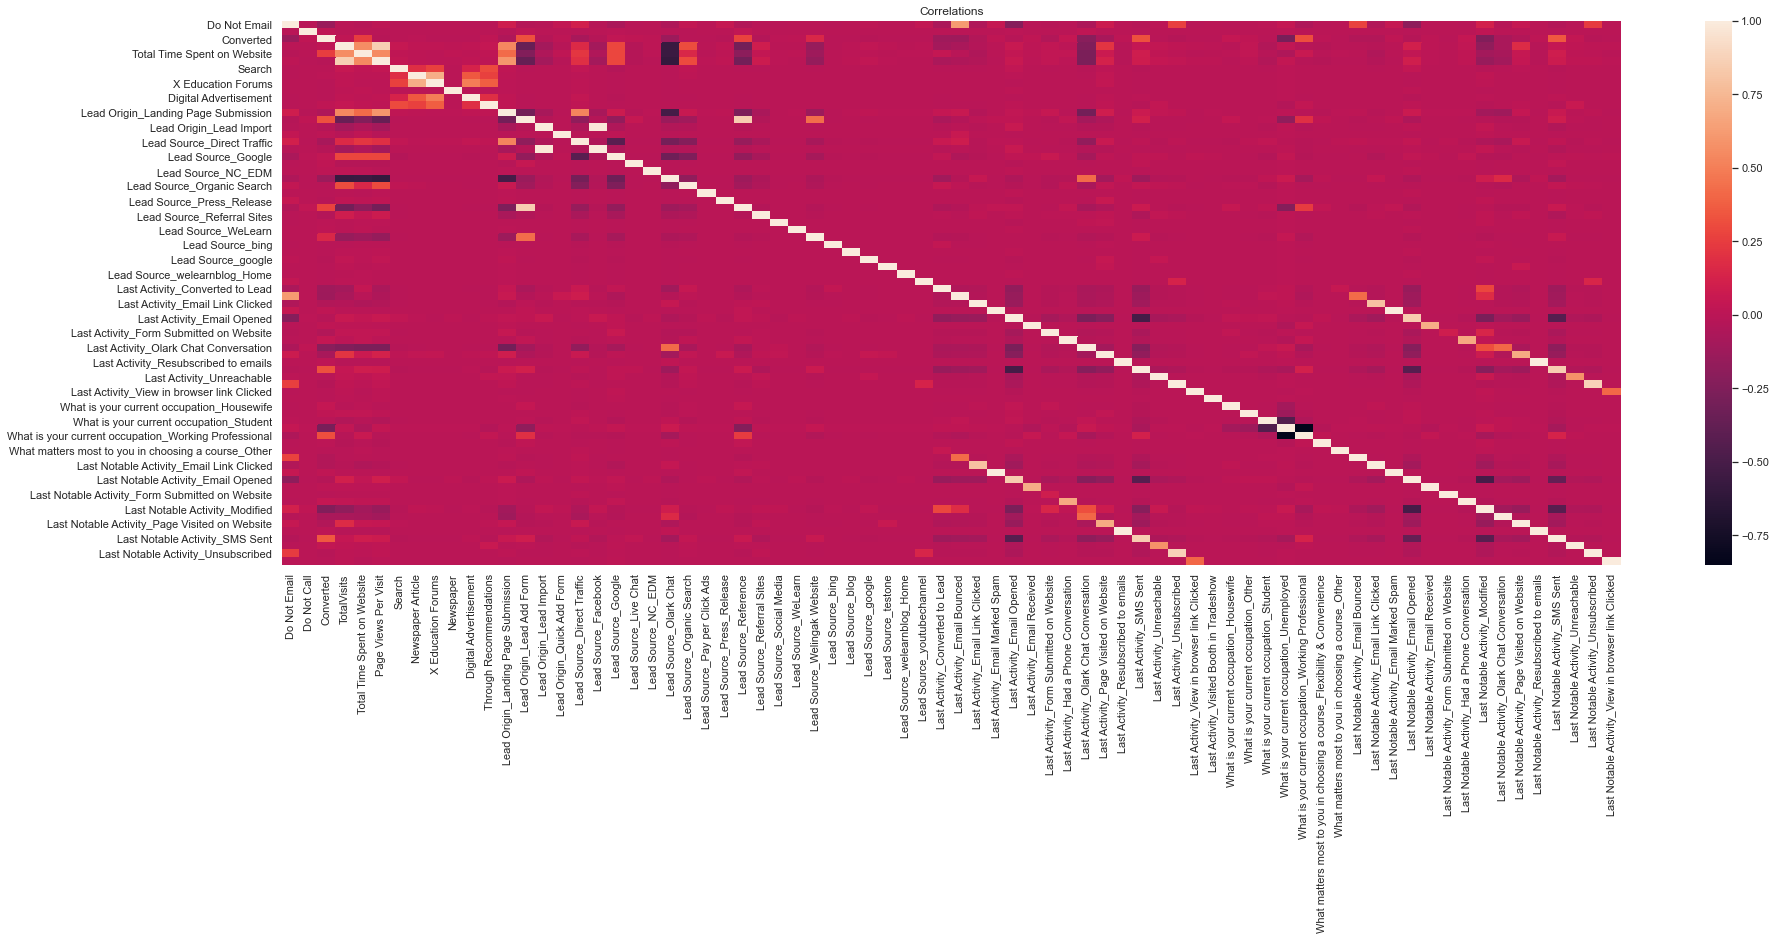

In [2147]:
plt.figure(figsize=(30,10))

# setting the title

plt.title('Correlations')

# Plotting a heatmap

sns.heatmap(lead.corr(method='spearman'))

plt.show()

In [2148]:
round(lead.describe(percentiles=[0.5,0.15,0.25,0.35,0.45,0.55,0.65,0.75,0.85,0.95]),2)

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,...,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00,9240.00
mean,0.08,0.00,0.39,3.39,487.70,2.33,0.00,0.00,0.00,0.00,...,0.00,0.00,0.37,0.02,0.03,0.00,0.24,0.00,0.01,0.00
std,0.27,0.01,0.49,4.84,548.02,2.16,0.04,0.01,0.01,0.01,...,0.01,0.04,0.48,0.14,0.18,0.01,0.42,0.06,0.07,0.01
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
15%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,12.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
35%,0.00,0.00,0.00,2.00,98.00,1.50,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
45%,0.00,0.00,0.00,2.00,198.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.00,0.00,0.00,3.00,248.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
55%,0.00,0.00,0.00,3.00,305.00,2.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


As we can see there are outliers in 2 variables 'TotalVisits' ,Total Time Spent on Website	, 'Page Views Per Visit'.

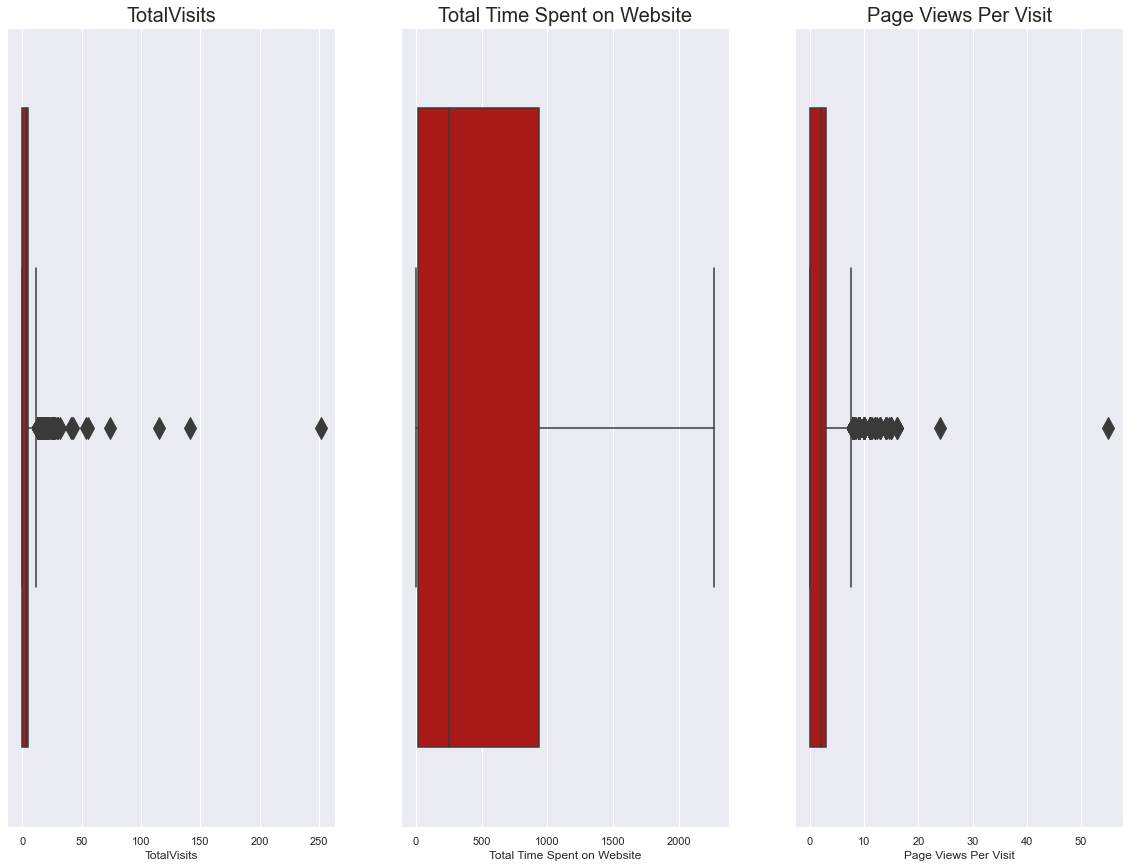

In [2149]:
col={0:'TotalVisits',1:'Total Time Spent on Website',2:'Page Views Per Visit'}

# Visualising the outliers with boxplot for all the variables 
plt.figure(figsize=(20,50))

for i in range(3):
    plt.subplot(3,3,i+1)
    plt.title(col[i],fontsize=20)
    sns.boxplot(x=lead[col[i]],data=lead,palette='gist_heat',orient='n',fliersize=15)

on 0.25 quartile we can check that total visit and page views per visit has skewed data which is skewed on the left w.r.t the mean, thus we will take median as our parameter on the skewness....class m aise bataya gaya tha....write it...ask pulkit what to do...next

we will create bin for total visit as its till 250

In [2150]:
ranges_total_visits={'TotalVisits_0_50': 50,'TotalVisits_50_100': 100,'TotalVisits_100_150': 150,
                     'TotalVisits_150_200' : 200,'TotalVisits_200_250': 250,'TotalVisits_250_300': 300}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits.keys()))):
    lead[list(ranges_total_visits.keys())[i]]=lead['TotalVisits'].map(lambda x: 1 if (x < list(ranges_total_visits.values())[i] 
                                                                                      and
                                                                                      x >= (list(ranges_total_visits.values())[i] - 50)) 
                                                                      else 0)


we will create bin for page views per visit visit as its till ~60

In [2151]:
ranges_total_visits_1={'Page Views Per Visit_0_10': 10,'Page Views Per Visit_10_20': 20,'Page Views Per Visit_20_30': 30,
                     'Page Views Per Visit_30_40' : 40,'Page Views Per Visit_40_50': 50,'Page Views Per Visit_50_60': 60}

# Assigning '1' or '0' to each bins

for i in range(len(list(ranges_total_visits_1.keys()))):
    lead[list(ranges_total_visits_1.keys())[i]]=lead['Page Views Per Visit'].map(lambda x: 1 if (x < list(ranges_total_visits_1.values())[i] 
                                                                                                     and x >= (list(ranges_total_visits_1.values())[i] - 10)) 
                                                                                     else 0)

lets check the outliers again

In [2152]:
lead.columns

Index(['Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last

In [2153]:
lead.shape

(9240, 86)

In [2154]:
lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0.0,0,0.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2155]:
redundant=['TotalVisits','Page Views Per Visit']
lead = lead.drop(redundant,1)

In [2156]:
lead.head()

,Do Not Email,Do Not Call,Converted,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,674,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,1532,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,305,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,1428,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


MOdel building



In [2157]:
from sklearn.model_selection import train_test_split

In [2158]:
X=lead.drop('Converted',1)

y=lead['Converted']    


In [2159]:
X.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,674,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1532,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,305,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1428,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [2160]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [2161]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [2162]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [2163]:
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


moving ahead with total time spent on website because its importand in business AIM but the col has outliers

In [2164]:
X_train[['Total Time Spent on Website']]=scaler.fit_transform(X_train[['Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2165]:
(sum(y)/len(y.index))*100

38.53896103896104

conversion rate looks good as it for a dataset as big as this is ~39% is good

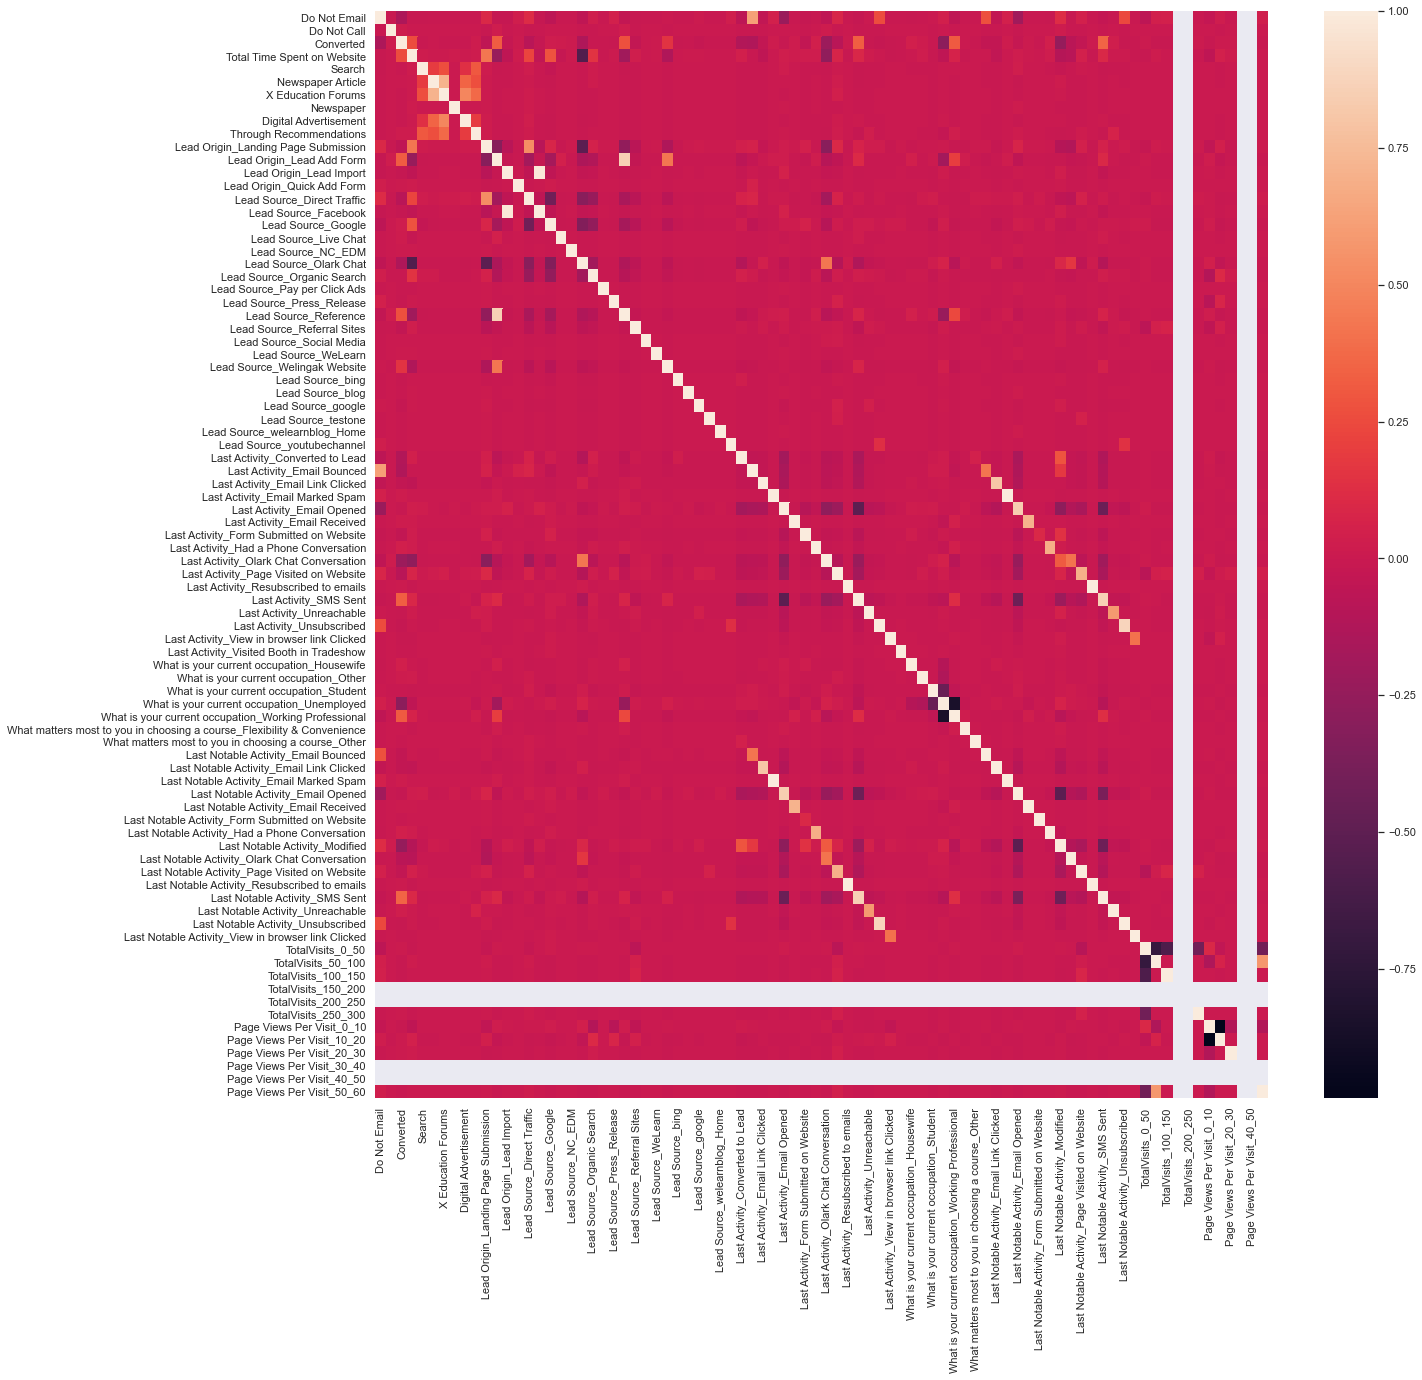

In [2166]:
plt.figure(figsize=(20,20))

sns.heatmap(lead.corr(method='spearman'))

plt.show()

In [2167]:
X_train

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
1871,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6795,0,0,0.005716,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3516,0,0,-0.691418,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8105,0,0,1.365219,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3934,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
79,0,0,0.404601,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8039,0,0,-0.885371,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6936,0,0,-0.449891,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


# building a model

In [2168]:
import statsmodels.api as sm

In [2169]:
logis=sm.GLM(y_train,(sm.add_constant(X_train)),familt=sm.families.Binomial())
logis.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6395
Model Family:                Gaussian   Df Model:                           72
Link Function:               identity   Scale:                         0.13682
Method:                          IRLS   Log-Likelihood:                -2708.0
Date:                Sun, 07 Feb 2021   Deviance:                       874.90
Time:                        10:59:49   Pearson chi2:                     875.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                       0.7415      0.226      3.275      0.001       0.298       1.185
Do Not Email                                                               -0.1234      0.025     -5.032      0.000      -0.171      -0.075
Do Not Call                                                                 0.4898      0.262      1.869      0.062      -0.024       1.003
Total Time Spent on Website                                                 0.1835      0.005     35.217      0.000       0.173       0.194
Search                                                                      0.0879      0.121      0.724      0.469      -0.150       0.326
Newspaper Article                                                           0.6324      0.371      1.706      0.088      -0.094       1.359
X Education Forums                                                         -0.7071      0.611     -1.158      0.247      -1.904       0.490
Newspaper                                                                  -0.6866      0.370     -1.854      0.064      -1.412       0.039
Digital Advertisement                                                      -0.3820      0.262     -1.458      0.145      -0.895       0.131
Through Recommendations                                                     0.1419      0.157      0.902      0.367      -0.166       0.450
Lead Origin_Landing Page Submission                                        -0.0244      0.014     -1.795      0.073      -0.051       0.002
Lead Origin_Lead Add Form                                                   0.4840      0.071      6.791      0.000       0.344       0.624
Lead Origin_Lead Import                                                     0.1791      0.264      0.677      0.498      -0.339       0.697
Lead Origin_Quick Add Form                                                  0.3404      0.371      0.916      0.359      -0.388       1.068
Lead Source_Direct Traffic                                                 -0.0158      0.225     -0.070      0.944      -0.458       0.426
Lead Source_Facebook                                                       -0.1912      0.347     -0.551      0.582      -0.872       0.489
Lead Source_Google                                                          0.0385      0.225      0.171      0.864      -0.403       0.480
Lead Source_Live Chat                                                       0.1651      0.338      0.489      0.625      -0.497       0.828
Lead Source_NC_EDM                                                          0.5933      0.433      1.370      0.171      -0.256       1.442
Lea

P value is insignificant for many variable

Lets check by RFE

In [2170]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg=LogisticRegression() 

In [2171]:
rfem = RFE(logreg,15)

rfem = rfem.fit(X_train,y_train)

In [2172]:
# checking for ture and false assigned to the variables after rfe

rfem.support_

array([ True, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [2173]:
# selecting True columns only and now adding constant

col=X_train.columns[rfem.support_]

X_train_1=sm.add_constant(X_train[col])    

In [2174]:
# First model after RFE

logis1=sm.GLM(y_train,X_train_1,family=sm.families.Binomial())

reg1=logis1.fit()

reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.1
Date:                Sun, 07 Feb 2021   Deviance:                       5396.2
Time:                        11:00:01   Pearson chi2:                 7.11e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0729      0.068      1.071      0.284      -0.060       0.206
Do Not Email                                            -1.2466      0.195     -6.387      0.000      -1.629      -0.864
Total Time Spent on Website                              1.1002      0.039     27.997      0.000       1.023       1.177
Lead Origin_Lead Add Form                                3.7950      0.191     19.905      0.000       3.421       4.169
Lead Source_Olark Chat                                   1.1718      0.102     11.457      0.000       0.971       1.372
Lead Source_Welingak Website                             1.9692      0.744      2.647      0.008       0.511       3.427
Last Activity_Email Bounced                             -1.0898      0.347     -3.139      0.002      -1.770      -0.409
Last Activity_Olark Chat Conversation                   -1.0933      0.192     -5.692      0.000      -1.470      -0.717
What is your current occupation_Housewife               22.9736   1.37e+04      0.002      0.999   -2.68e+04    2.69e+04
What is your current occupation_Working Professional     2.7611      0.187     14.792      0.000       2.395       3.127
Last Notable Activity_Email Link Clicked                -1.9010      0.272     -6.982      0.000      -2.435      -1.367
Last Notable Activity_Email Opened                      -1.3147      0.087    -15.160      0.000      -1.485      -1.145
Last Notable Activity_Had a Phone Conversation           2.1462      1.099      1.952      0.051      -0.008       4.301
Last Notable Activity_Modified                          -1.8200      0.096    -19.049      0.000      -2.007      -1.633
Last Notable Activity_Olark Chat Conversation           -1.5720      0.373     -4.218      0.000      -2.302      -0.842
Last Notable Activity_Page Visited on Website           -1.5801      0.191     -8.254      0.000      -1.955      -1.205
========================================================================================================================
"""

Now, From this above summary there are some features having high p -values, we will now drop the features which is having insignificant values one by one and create new model again and again until all the features attain significant p- value.

# checking VIF

In [2175]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2176]:
# Create VIF dataframe

vif=pd.DataFrame()

In [2177]:
#adding some features to X_train
vif['Features']=X_train_1[col].columns

In [2178]:
# Lets Caculate the VIFs
vif['VIF']=[variance_inflation_factor(X_train_1[col].values,i) for i in range(X_train_1[col].shape[1])]

In [2179]:
vif['VIF']=round(vif['VIF'],2)

In [2180]:
vif=vif.sort_values(by='VIF',ascending=False)

In [2181]:
vif

,Features,VIF
6,Last Activity_Olark Chat Conversation,1.91
0,Do Not Email,1.80
5,Last Activity_Email Bounced,1.79
3,Lead Source_Olark Chat,1.66
12,Last Notable Activity_Modified,1.55
2,Lead Origin_Lead Add Form,1.41
13,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.24
1,Total Time Spent on Website,1.20
8,What is your current occupation_Working Profes...,1.14


As an Industry rule value around 1 for VIF is considered a good value and model looks nice and all the values are having values< 5 so its less co-linear.

we also see that the col named "What is your current occupation_Housewife	" has a value 0.999 so we will drop it and make the model again

In [2182]:
# Dropping the most insignificant values ('What is your current occupation_Housewife') and constant

X_train_2=X_train_1.drop(['const','What is your current occupation_Housewife'],1)

create a new model

In [2183]:
X_train_2=sm.add_constant(X_train_2)                              # Adding constant
logis2=sm.GLM(y_train,X_train_2,families=sm.families.Binomial())  # Using GLM, creating model
reg2=logis2.fit()                                                 # Fitting our model
reg2.summary()       

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.13905
Method:                          IRLS   Log-Likelihood:                -2789.7
Date:                Sun, 07 Feb 2021   Deviance:                       897.26
Time:                        11:00:03   Pearson chi2:                     897.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4986      0.010     48.322      0.000       0.478       0.519
Do Not Email                                            -0.1507      0.023     -6.646      0.000      -0.195      -0.106
Total Time Spent on Website                              0.1879      0.005     36.249      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5593      0.020     28.110      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1697      0.014     12.021      0.000       0.142       0.197
Lead Source_Welingak Website                             0.1937      0.043      4.456      0.000       0.109       0.279
Last Activity_Email Bounced                             -0.0598      0.033     -1.836      0.066      -0.124       0.004
Last Activity_Olark Chat Conversation                   -0.1263      0.020     -6.293      0.000      -0.166      -0.087
What is your current occupation_Working Professional     0.3445      0.018     19.032      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3059      0.036     -8.585      0.000      -0.376      -0.236
Last Notable Activity_Email Opened                      -0.2215      0.013    -17.341      0.000      -0.247      -0.196
Last Notable Activity_Had a Phone Conversation           0.2408      0.113      2.134      0.033       0.020       0.462
Last Notable Activity_Modified                          -0.2961      0.013    -22.814      0.000      -0.322      -0.271
Last Notable Activity_Olark Chat Conversation           -0.2799      0.040     -7.036      0.000      -0.358      -0.202
Last Notable Activity_Page Visited on Website           -0.2684      0.026    -10.205      0.000      -0.320      -0.217
========================================================================================================================
"""

Again, we can see from above summary that variable 'Last Activity_Had a Phone Conversation' is in-significant hence dropping it and recreating a new model

In [2184]:
# Dropping the most insignificant values ('Last Notable Activity_Had a Phone Conversation') and constant

X_train_3=X_train_2.drop(['const','Last Notable Activity_Had a Phone Conversation'],1)

In [2185]:
# Recreating a new model

X_train_3=sm.add_constant(X_train_3)                                # Adding constant
logis3=sm.GLM(y_train,X_train_3,families=sm.families.Binomial())    # Using GLM, creating model
reg3=logis3.fit()                                                   # Fitting our model
reg3.summary()                                                      # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Gaussian   Df Model:                           13
Link Function:               identity   Scale:                         0.13912
Method:                          IRLS   Log-Likelihood:                -2791.9
Date:                Sun, 07 Feb 2021   Deviance:                       897.89
Time:                        11:00:03   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5003      0.010     48.625      0.000       0.480       0.520
Do Not Email                                            -0.1515      0.023     -6.678      0.000      -0.196      -0.107
Total Time Spent on Website                              0.1880      0.005     36.250      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5585      0.020     28.068      0.000       0.520       0.598
Lead Source_Olark Chat                                   0.1696      0.014     12.011      0.000       0.142       0.197
Lead Source_Welingak Website                             0.1938      0.043      4.455      0.000       0.109       0.279
Last Activity_Email Bounced                             -0.0595      0.033     -1.825      0.068      -0.123       0.004
Last Activity_Olark Chat Conversation                   -0.1263      0.020     -6.292      0.000      -0.166      -0.087
What is your current occupation_Working Professional     0.3448      0.018     19.046      0.000       0.309       0.380
Last Notable Activity_Email Link Clicked                -0.3075      0.036     -8.630      0.000      -0.377      -0.238
Last Notable Activity_Email Opened                      -0.2232      0.013    -17.502      0.000      -0.248      -0.198
Last Notable Activity_Modified                          -0.2977      0.013    -22.968      0.000      -0.323      -0.272
Last Notable Activity_Olark Chat Conversation           -0.2815      0.040     -7.075      0.000      -0.359      -0.204
Last Notable Activity_Page Visited on Website           -0.2700      0.026    -10.268      0.000      -0.322      -0.218
========================================================================================================================
"""

Again, from above summary we can see that one variable 'Last Activity_Email Bounced' is insignificant hence dropping from the dataset.

In [2186]:
# Dropping the most insignificant values ('Last Notable Activity_Email Bounced') and constant

X_train_4=X_train_3.drop(['const','Last Activity_Email Bounced'],1)

In [2187]:

# Recreating a new model

X_train_4=sm.add_constant(X_train_4)                              # Adding constant
logis4=sm.GLM(y_train,X_train_4,families=sm.families.Binomial())  # Using GLM, creating model
reg4=logis4.fit()                                                 # Fitting our model
reg4.summary()                                                    # Showing the summary of the model created

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Gaussian   Df Model:                           12
Link Function:               identity   Scale:                         0.13917
Method:                          IRLS   Log-Likelihood:                -2793.6
Date:                Sun, 07 Feb 2021   Deviance:                       898.36
Time:                        11:00:03   Pearson chi2:                     898.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.5015      0.010     48.826      0.000       0.481       0.522
Do Not Email                                            -0.1771      0.018     -9.938      0.000      -0.212      -0.142
Total Time Spent on Website                              0.1878      0.005     36.209      0.000       0.178       0.198
Lead Origin_Lead Add Form                                0.5584      0.020     28.060      0.000       0.519       0.597
Lead Source_Olark Chat                                   0.1686      0.014     11.948      0.000       0.141       0.196
Lead Source_Welingak Website                             0.1951      0.043      4.486      0.000       0.110       0.280
Last Activity_Olark Chat Conversation                   -0.1225      0.020     -6.134      0.000      -0.162      -0.083
What is your current occupation_Working Professional     0.3450      0.018     19.053      0.000       0.310       0.381
Last Notable Activity_Email Link Clicked                -0.3083      0.036     -8.650      0.000      -0.378      -0.238
Last Notable Activity_Email Opened                      -0.2242      0.013    -17.588      0.000      -0.249      -0.199
Last Notable Activity_Modified                          -0.3012      0.013    -23.495      0.000      -0.326      -0.276
Last Notable Activity_Olark Chat Conversation           -0.2846      0.040     -7.160      0.000      -0.363      -0.207
Last Notable Activity_Page Visited on Website           -0.2673      0.026    -10.180      0.000      -0.319      -0.216
========================================================================================================================
"""

no variables is having p - value greater than 5% hence we can proceed with our next step

# Creating VIF with X_train_4 data set¶


In [2188]:
X_train_4_1=X_train_4.drop('const',1)     # dropping constant and saving in new dataset
vif=pd.DataFrame()                        # Creating new VIF DataFrame
vif['Features']=X_train_4_1.columns       # Adding final train dataset features

In [2189]:
# Now calculating

vif['VIF']=[variance_inflation_factor(X_train_4_1.values,i) for i in range(X_train_4_1.shape[1])]

In [2190]:
# Rounding the vif values

vif['VIF']=round(vif['VIF'],2)

In [2191]:
# Sorting the vif dataset

vif=vif.sort_values(by='VIF',ascending=False)

In [2192]:
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.89
3,Lead Source_Olark Chat,1.65
9,Last Notable Activity_Modified,1.51
2,Lead Origin_Lead Add Form,1.41
10,Last Notable Activity_Olark Chat Conversation,1.30
4,Lead Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
6,What is your current occupation_Working Profes...,1.14
0,Do Not Email,1.11
8,Last Notable Activity_Email Opened,1.10


in ourfinal model we are going to use it predict the X train dataset.

In [2193]:
# Predicting the train dataset with our final model

y_train_pred=reg4.predict(X_train_4)

# Creating a new dataset and saving predicted values in it

y_train_pred_final=pd.DataFrame({'Converted':y_train.values,'Converted_probability':y_train_pred,'ID':y_train.index})

y_train_pred_final.head()

,Converted,Converted_probability,ID
1871,0,0.279680,1871
6795,0,0.278385,6795
3516,0,0.316095,3516
8105,0,0.757785,8105
3934,0,0.202654,3934


# ROC Curve Plotting

In [2194]:
from sklearn.metrics import roc_curve       
from sklearn.metrics import roc_auc_score

In [2195]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

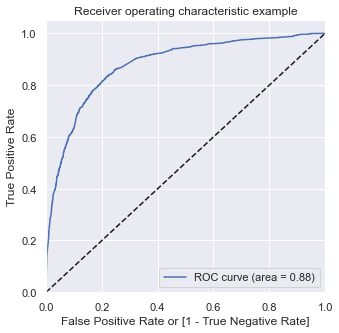

In [2196]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_probability)

Finding Optimal Cutoff Point

In [2197]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_probability'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.279680,1871,1,1,1,0,0,0,0,0,0,0
6795,0,0.278385,6795,1,1,1,0,0,0,0,0,0,0
3516,0,0.316095,3516,1,1,1,1,0,0,0,0,0,0
8105,0,0.757785,8105,1,1,1,1,1,1,1,1,0,0
3934,0,0.202654,3934,1,1,1,0,0,0,0,0,0,0


# Caculating accuracy, sensitivity and specificity with probability cutoffs


In [2198]:
from sklearn.metrics import confusion_matrix

In [2199]:
cutoff_df = pd.DataFrame( columns = ['Probability','accuracy','sensitivity','specificity'])
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'],y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  accuracy  sensitivity  specificity
0.0          0.0  0.423469     0.996756     0.070215
0.1          0.1  0.555659     0.975669     0.296852
0.2          0.2  0.698825     0.935929     0.552724
0.3          0.3  0.791589     0.862530     0.747876
0.4          0.4  0.808442     0.790754     0.819340
0.5          0.5  0.810606     0.682076     0.889805
0.6          0.6  0.780458     0.517843     0.942279
0.7          0.7  0.750000     0.392133     0.970515
0.8          0.8  0.719233     0.289132     0.984258
0.9          0.9  0.680891     0.171533     0.994753


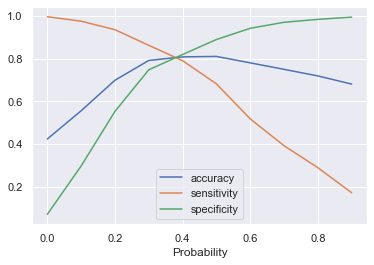

In [2200]:
# Line Ploting 'Accuracy' , 'Sensitivity' and 'Specificity' for various probabilities(0.0 to 0.9).

cutoff_df.plot.line(x='Probability', y=['accuracy','sensitivity','specificity'])
plt.show()

We can see 0.39 as cutoff score

In [2201]:
y_train_pred_final['Predicted']=y_train_pred_final['Converted_probability'].map(lambda x:1 if x >0.39 else 0 )  # Predicted value 

y_train_pred_final.head()

,Converted,Converted_probability,ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Predicted
1871,0,0.279680,1871,1,1,1,0,0,0,0,0,0,0,0
6795,0,0.278385,6795,1,1,1,0,0,0,0,0,0,0,0
3516,0,0.316095,3516,1,1,1,1,0,0,0,0,0,0,0
8105,0,0.757785,8105,1,1,1,1,1,1,1,1,0,0,1
3934,0,0.202654,3934,1,1,1,0,0,0,0,0,0,0,0


In [2202]:
TP = confusion_pr[1,1] # true positive 
TN = confusion_pr[0,0] # true negatives
FP = confusion_pr[0,1] # false positives
FN = confusion_pr[1,0] # false negatives

In [2203]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7988645579886455

In [2204]:
# Let us calculate specificity
TN / float(TN+FP)

0.8123438280859571

In [2205]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.187656171914043


In [2206]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7239985299522235


In [2207]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8676274352815586


# precision and recall

In [2208]:
confusion_pr=confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.Predicted)
confusion_pr

array([[3251,  751],
       [ 496, 1970]], dtype=int64)

In [2209]:
##### Precision
TP / TP + FP

752.0

In [2210]:
confusion_pr[1,1]/(confusion_pr[0,1]+confusion_pr[1,1])

0.7239985299522235

##Recall
TP / TP + FN

In [2211]:
confusion_pr[1,1]/(confusion_pr[1,0]+confusion_pr[1,1])

0.7988645579886455

Using sklearn utilities for the same

In [2212]:
from sklearn.metrics import precision_score, recall_score

In [2213]:
?precision_score

In [2214]:
precision_score(y_train_pred_final.Converted, y_train_pred_final['Predicted'])

0.7239985299522235

In [2215]:
recall_score(y_train_pred_final.Converted, y_train_pred_final['Predicted'])

0.7988645579886455

### Precision and recall tradeoff

In [2216]:
from sklearn.metrics import precision_recall_curve

In [2217]:
y_train_pred_final.Converted, y_train_pred_final['Predicted']

(1871    0
 6795    0
 3516    0
 8105    0
 3934    0
        ..
 350     1
 79      1
 8039    1
 6936    0
 5640    0
 Name: Converted, Length: 6468, dtype: int64,
 1871    0
 6795    0
 3516    0
 8105    1
 3934    0
        ..
 350     1
 79      1
 8039    0
 6936    0
 5640    0
 Name: Predicted, Length: 6468, dtype: int64)

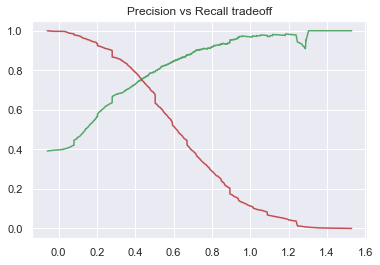

In [2218]:

# Creating precision recall curve by crreating three points and plotting

p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_probability)
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()

the meeting point is nearly at (0.42,0.78)

# Making predictions on the test set

In [2219]:
X_test[['Total Time Spent on Website']]=scaler.transform(X_test[['Total Time Spent on Website']])

In [2220]:
X_test.head()

,Do Not Email,Do Not Call,Total Time Spent on Website,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,...,TotalVisits_100_150,TotalVisits_150_200,TotalVisits_200_250,TotalVisits_250_300,Page Views Per Visit_0_10,Page Views Per Visit_10_20,Page Views Per Visit_20_30,Page Views Per Visit_30_40,Page Views Per Visit_40_50,Page Views Per Visit_50_60
4269,0,0,1.011000e+03,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2376,0,0,6.701161e-17,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7766,0,0,5.900000e+01,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9199,0,0,6.701161e-17,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4359,0,0,6.701161e-17,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [2221]:
test_cols=X_train_4.columns[1:]              # Taking the same column train set has
X_test_final=X_test[test_cols]               # Updating it in the final test set
X_test_final=sm.add_constant(X_test_final)   # Adding constant to the final set set
y_pred_test=reg4.predict(X_test_final)       # Predicting the final test set

In [2222]:

y_test_pred_final=pd.DataFrame({'Converted':y_test.values,'Converted_Probability':y_pred_test,'ID':y_test.index})

y_test_pred_final.head() 

,Converted,Converted_Probability,ID
4269,1,190.319411,4269
2376,1,1.059907,2376
7766,1,11.923900,7766
9199,0,0.246366,9199
4359,1,0.835757,4359


In [2223]:
from sklearn import metrics    # Imprting metrics from sklearn

print('Accuracy score in predicting test dataset :',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final['Predicted']))

Accuracy score in predicting test dataset : 0.807204700061843


# CONCLUSION

1. We have high recall score than precision score
2. Important features are:
    a) Last Notable Activity_Page Visited on Website
    b) Last Notable Activity_Email Opened
    C) Last Notable Activity_Email Link Clicked	

Thank you